In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import random



--- 
 - XOR 문제 - 단층 퍼셉트론 구현하기 
   - 이번 챕터에서는 파이토치를 사용해서 단층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도해보겠습니다 



model : 
    Sequential(
      (0): Linear(in_features=2, out_features=1, bias=True)
      (1): Sigmoid()
    ) 
    0.weight    torch.Size([1, 2])
        tensor([[-0.5913, -0.0125]])
    0.bias    torch.Size([1])
        tensor([-0.1368])

-------------------------------------------------------------------------------- 
epoch :    0/1000 
cost : 0.727397 
accuracy : 0.50 

-------------------------------------------------------------------------------- 
epoch :  100/1000 
cost : 0.693148 
accuracy : 0.50 

-------------------------------------------------------------------------------- 
epoch :  200/1000 
cost : 0.693147 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  300/1000 
cost : 0.693147 
accuracy : 0.75 

-------------------------------------------------------------------------------- 
epoch :  400/1000 
cost : 0.693147 
accuracy : 0.50 

-----------------------------------------------------------------------------

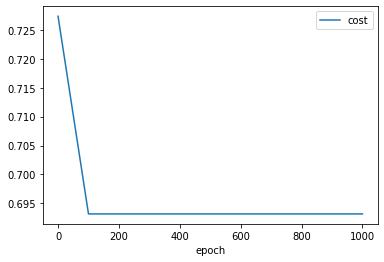

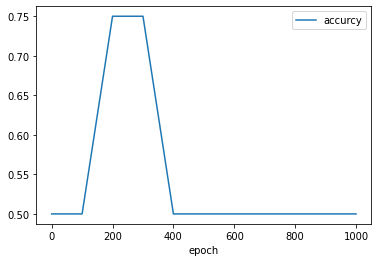

model : 
    Sequential(
      (0): Linear(in_features=2, out_features=1, bias=True)
      (1): Sigmoid()
    ) 
    0.weight    torch.Size([1, 2])
        tensor([[-1.1921e-07, -1.1921e-07]])
    0.bias    torch.Size([1])
        tensor([8.9407e-08])



In [2]:


device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(777)

if device == "cuda":
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

model = nn.Sequential(
    nn.Linear(2, 1, bias=True),
    nn.Sigmoid()
).to(device)

mu.log("model", model)
nb_epochs = 1000
mu.plt_init()
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

for epoch in range(nb_epochs + 1):
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        accuracy = mu.get_binary_classification_accuracy(hypothesis, Y)
        mu.log_epoch(epoch, nb_epochs, cost, accuracy)

mu.plt_show()
mu.log("model", model)



--- 
 - 학습된 단층 퍼셉트론의 예측값 확인하기 
   - 총 10,001회 학습한 단층 퍼셉트론의 예측값도 확인해보겠습니다. 


In [3]:


with torch.no_grad():
    hypothesis = model(X)
    mu.log("hypothesis", hypothesis)
    predicted = (hypothesis > 0.5).float()
    mu.log("predicted", predicted)
    accuracy = (predicted == Y).float().mean()
    mu.log("Y", Y)
    mu.log("accuracy", accuracy)


hypothesis : 
    torch.Size([4, 1]) tensor([[0.5000],
            [0.5000],
            [0.5000],
            [0.5000]])

predicted : 
    torch.Size([4, 1]) tensor([[0.],
            [0.],
            [0.],
            [0.]])

Y : 
    torch.Size([4, 1]) tensor([[0.],
            [1.],
            [1.],
            [0.]])

accuracy : 
    torch.Size([]) 0.5

